In [265]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import pickle

In [266]:
data = pd.read_csv("/content/secondary_data.csv")

In [267]:
# Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nData Information:")
print(data.info())

Dataset Head:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0  

In [268]:
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [269]:
# Display count of unique values for each column
unique_counts = data.apply(lambda x: x.value_counts(dropna=False),result_type='reduce')
for column in data.columns:
    print(f"Unique value counts for column {column}:")
    print(unique_counts[column])
    print("\n")

Unique value counts for column class:
class
p    33888
e    27181
Name: count, dtype: int64


Unique value counts for column cap-diameter:
cap-diameter
3.18     103
3.14      98
3.13      96
3.85      95
3.25      95
        ... 
51.39      1
47.85      1
50.18      1
45.67      1
20.42      1
Name: count, Length: 2571, dtype: int64


Unique value counts for column cap-shape:
cap-shape
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: count, dtype: int64


Unique value counts for column cap-surface:
cap-surface
NaN    14120
t       8196
s       7608
y       6341
h       4974
g       4724
d       4432
e       2584
k       2303
i       2225
w       2150
l       1412
Name: count, dtype: int64


Unique value counts for column cap-color:
cap-color
n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64


Unique value counts for column does-bruise-or-bleed:
d

In [270]:
# Get columns with object datatype
object_columns = data.select_dtypes(include=['object']).columns.tolist()

# Identify columns in object_columns that have NaN values
columns_with_nan = [col for col in object_columns if data[col].isnull().any()]

In [271]:
# Split columns into those where NaN is most frequent and those where it is not
columns_with_nan_as_most_frequent = []
columns_without_nan_as_most_frequent = []

for column in columns_with_nan:
    value_counts = data[column].value_counts(dropna=False)
    if value_counts.get(np.nan, 0) == value_counts.max():
        columns_with_nan_as_most_frequent.append(column)
    else:
        columns_without_nan_as_most_frequent.append(column)

# Fill columns where NaN is not the most frequent with the most frequent value
for column in columns_without_nan_as_most_frequent:
    most_frequent_value = data[column].value_counts().idxmax()
    data.fillna({column:most_frequent_value}, inplace=True)

print("Columns where NaN is the most frequent value:")
print(columns_with_nan_as_most_frequent)
print("\nColumns where NaN is not the most frequent value and have been filled with the most frequent value:")
print(columns_without_nan_as_most_frequent)
print("\nUpdated DataFrame after filling NaNs with the most frequent value:")
print(data.head())

Columns where NaN is the most frequent value:
['cap-surface', 'gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']

Columns where NaN is not the most frequent value and have been filled with the most frequent value:
['gill-attachment', 'ring-type']

Updated DataFrame after filling NaNs with the most frequent value:
  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e         

In [272]:
# For columns where NaN is the most frequent, you can manually assign values like this:
manual_values = {'cap-surface': 't', 'gill-spacing': 'c', 'stem-root':'s', 'stem-surface': 's','veil-type': 'u', 'veil-color': 'w','spore-print-color': 'k'}  # Example manual assignments
for column, value in manual_values.items():
    if column in columns_with_nan_as_most_frequent:
        data.fillna({column:value}, inplace=True)

print("\nUpdated DataFrame after manual assignment for columns with NaN as the most frequent value:")
print(data)


Updated DataFrame after manual assignment for columns with NaN as the most frequent value:
      class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e            c          w   
1                        f         

In [273]:
print(data.isnull().sum())

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


In [274]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# df=pd.DataFrame(data,columns=['cap-surface','gill-attachment','gill-spacing','stem-root','stem-surface','veil-color','ring-type'])
# data[df.columns] = imputer.fit_transform(data[df.columns])

In [275]:
# le = LabelEncoder()
# for column in data.columns:
#     if data[column].dtype == 'object':
#         data[column] = le.fit_transform(data[column])

In [276]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (excluding the target column 'class')
categorical_columns = data.select_dtypes(include=['object']).columns[data.select_dtypes(include=['object']).columns != 'class'].tolist()

# Initialize dictionary to store label encoders
label_encoders = {}

# Fit and transform each categorical feature using LabelEncoder
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Encode the target column 'class'
le_class = LabelEncoder()
data['class'] = le_class.fit_transform(data['class'])
label_encoders['class'] = le_class

# Save the encoders
joblib.dump(label_encoders, 'label_encoders.pkl')
data.to_csv('encoded_data.csv', index=False)

print("Encoded DataFrame:")
print(data)


Encoded DataFrame:
       class  cap-diameter  cap-shape  cap-surface  cap-color  \
0          1         15.26          6            2          6   
1          1         16.60          6            2          6   
2          1         14.07          6            2          6   
3          1         14.17          2            3          1   
4          1         14.64          6            3          6   
...      ...           ...        ...          ...        ...   
61064      1          1.18          5            7         11   
61065      1          1.27          2            7         11   
61066      1          1.27          5            7         11   
61067      1          1.24          2            7         11   
61068      1          1.17          5            7         11   

       does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                         0                2             0          10   
1                         0                2        

In [277]:
data.describe()

class  cap-diameter     cap-shape   cap-surface     cap-color  \
count  61069.000000  61069.000000  61069.000000  61069.000000  61069.000000   
mean       0.554913      6.733854      4.041641      6.065025      6.144541   
std        0.496979      5.264845      2.138630      3.063499      3.171077   
min        0.000000      0.380000      0.000000      0.000000      0.000000   
25%        0.000000      3.480000      2.000000      3.000000      5.000000   
50%        1.000000      5.860000      5.000000      8.000000      5.000000   
75%        1.000000      8.540000      6.000000      8.000000     10.000000   
max        1.000000     62.340000      6.000000     10.000000     11.000000   

       does-bruise-or-bleed  gill-attachment  gill-spacing    gill-color  \
count          61069.000000     61069.000000  61069.000000  61069.000000   
mean               0.173410         2.109990      0.242775      7.338502   
std                0.378605         2.204614      0.547217      3.186426   
min                0.000000         0.000000      0.000000      0.000000   
25%                0.000000         0.000000      0.000000      5.000000   
50%                0.000000         1.000000      0.000000      7.000000   
75%                0.000000         4.000000      0.000000     10.000000   
max                1.000000         6.000000      2.000000     11.000000   

        stem-height  ...     stem-root  stem-surface    stem-color  veil-type  \
count  61069.000000  ...  61069.000000  61069.000000  61069.000000    61069.0   
mean       6.581538  ...      3.699422      4.806629      8.429072        0.0   
std        3.370017  ...      0.968798      1.272054      3.218516        0.0   
min        0.000000  ...      0.000000      0.000000      0.000000        0.0   
25%        4.640000  ...      4.000000      5.000000      6.000000        0.0   
50%        5.950000  ...      4.000000      5.000000     11.000000        0.0   
75%        7.740000  ...      4.000000      5.000000     11.000000        0.0   
max       33.920000  ...      4.000000      7.000000     12.000000        0.0   

         veil-color      has-ring     ring-type  spore-print-color  \
count  61069.000000  61069.000000  61069.000000       61069.000000   
mean       3.956459      0.248555      1.449999           1.172346   
std        0.382556      0.432179      1.468299           0.803080   
min        0.000000      0.000000      0.000000           0.000000   
25%        4.000000      0.000000      1.000000           1.000000   
50%        4.000000      0.000000      1.000000           1.000000   
75%        4.000000      0.000000      1.000000           1.000000   
max        5.000000      1.000000      7.000000           6.000000   

            habitat        season  
count  61069.000000  61069.000000  
mean       0.623721      1.053300  
std        1.265880      1.100575  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      1.000000  
75%        1.000000      2.000000  
max        7.000000      3.000000  

[8 rows x 21 columns]

In [278]:
print(data.isnull().sum())

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


In [279]:
# Display count of unique values for each column
unique_counts = data.apply(lambda x: x.value_counts(dropna=False),result_type='reduce')
for column in data.columns:
    print(f"Unique value counts for column {column}:")
    print(unique_counts[column])
    print("\n")

Unique value counts for column class:
class
1    33888
0    27181
Name: count, dtype: int64


Unique value counts for column cap-diameter:
cap-diameter
3.18     103
3.14      98
3.13      96
3.85      95
3.25      95
        ... 
51.39      1
47.85      1
50.18      1
45.67      1
20.42      1
Name: count, Length: 2571, dtype: int64


Unique value counts for column cap-shape:
cap-shape
6    26934
2    13404
5     7164
0     5694
3     3460
4     2598
1     1815
Name: count, dtype: int64


Unique value counts for column cap-surface:
cap-surface
8     22316
7      7608
10     6341
3      4974
2      4724
0      4432
1      2584
5      2303
4      2225
9      2150
6      1412
Name: count, dtype: int64


Unique value counts for column cap-color:
cap-color
5     24218
11     8543
10     7666
2      4420
1      4035
6      3656
8      1782
9      1709
7      1703
3      1279
0      1230
4       828
Name: count, dtype: int64


Unique value counts for column does-bruise-or-bleed:
does-bruise-o

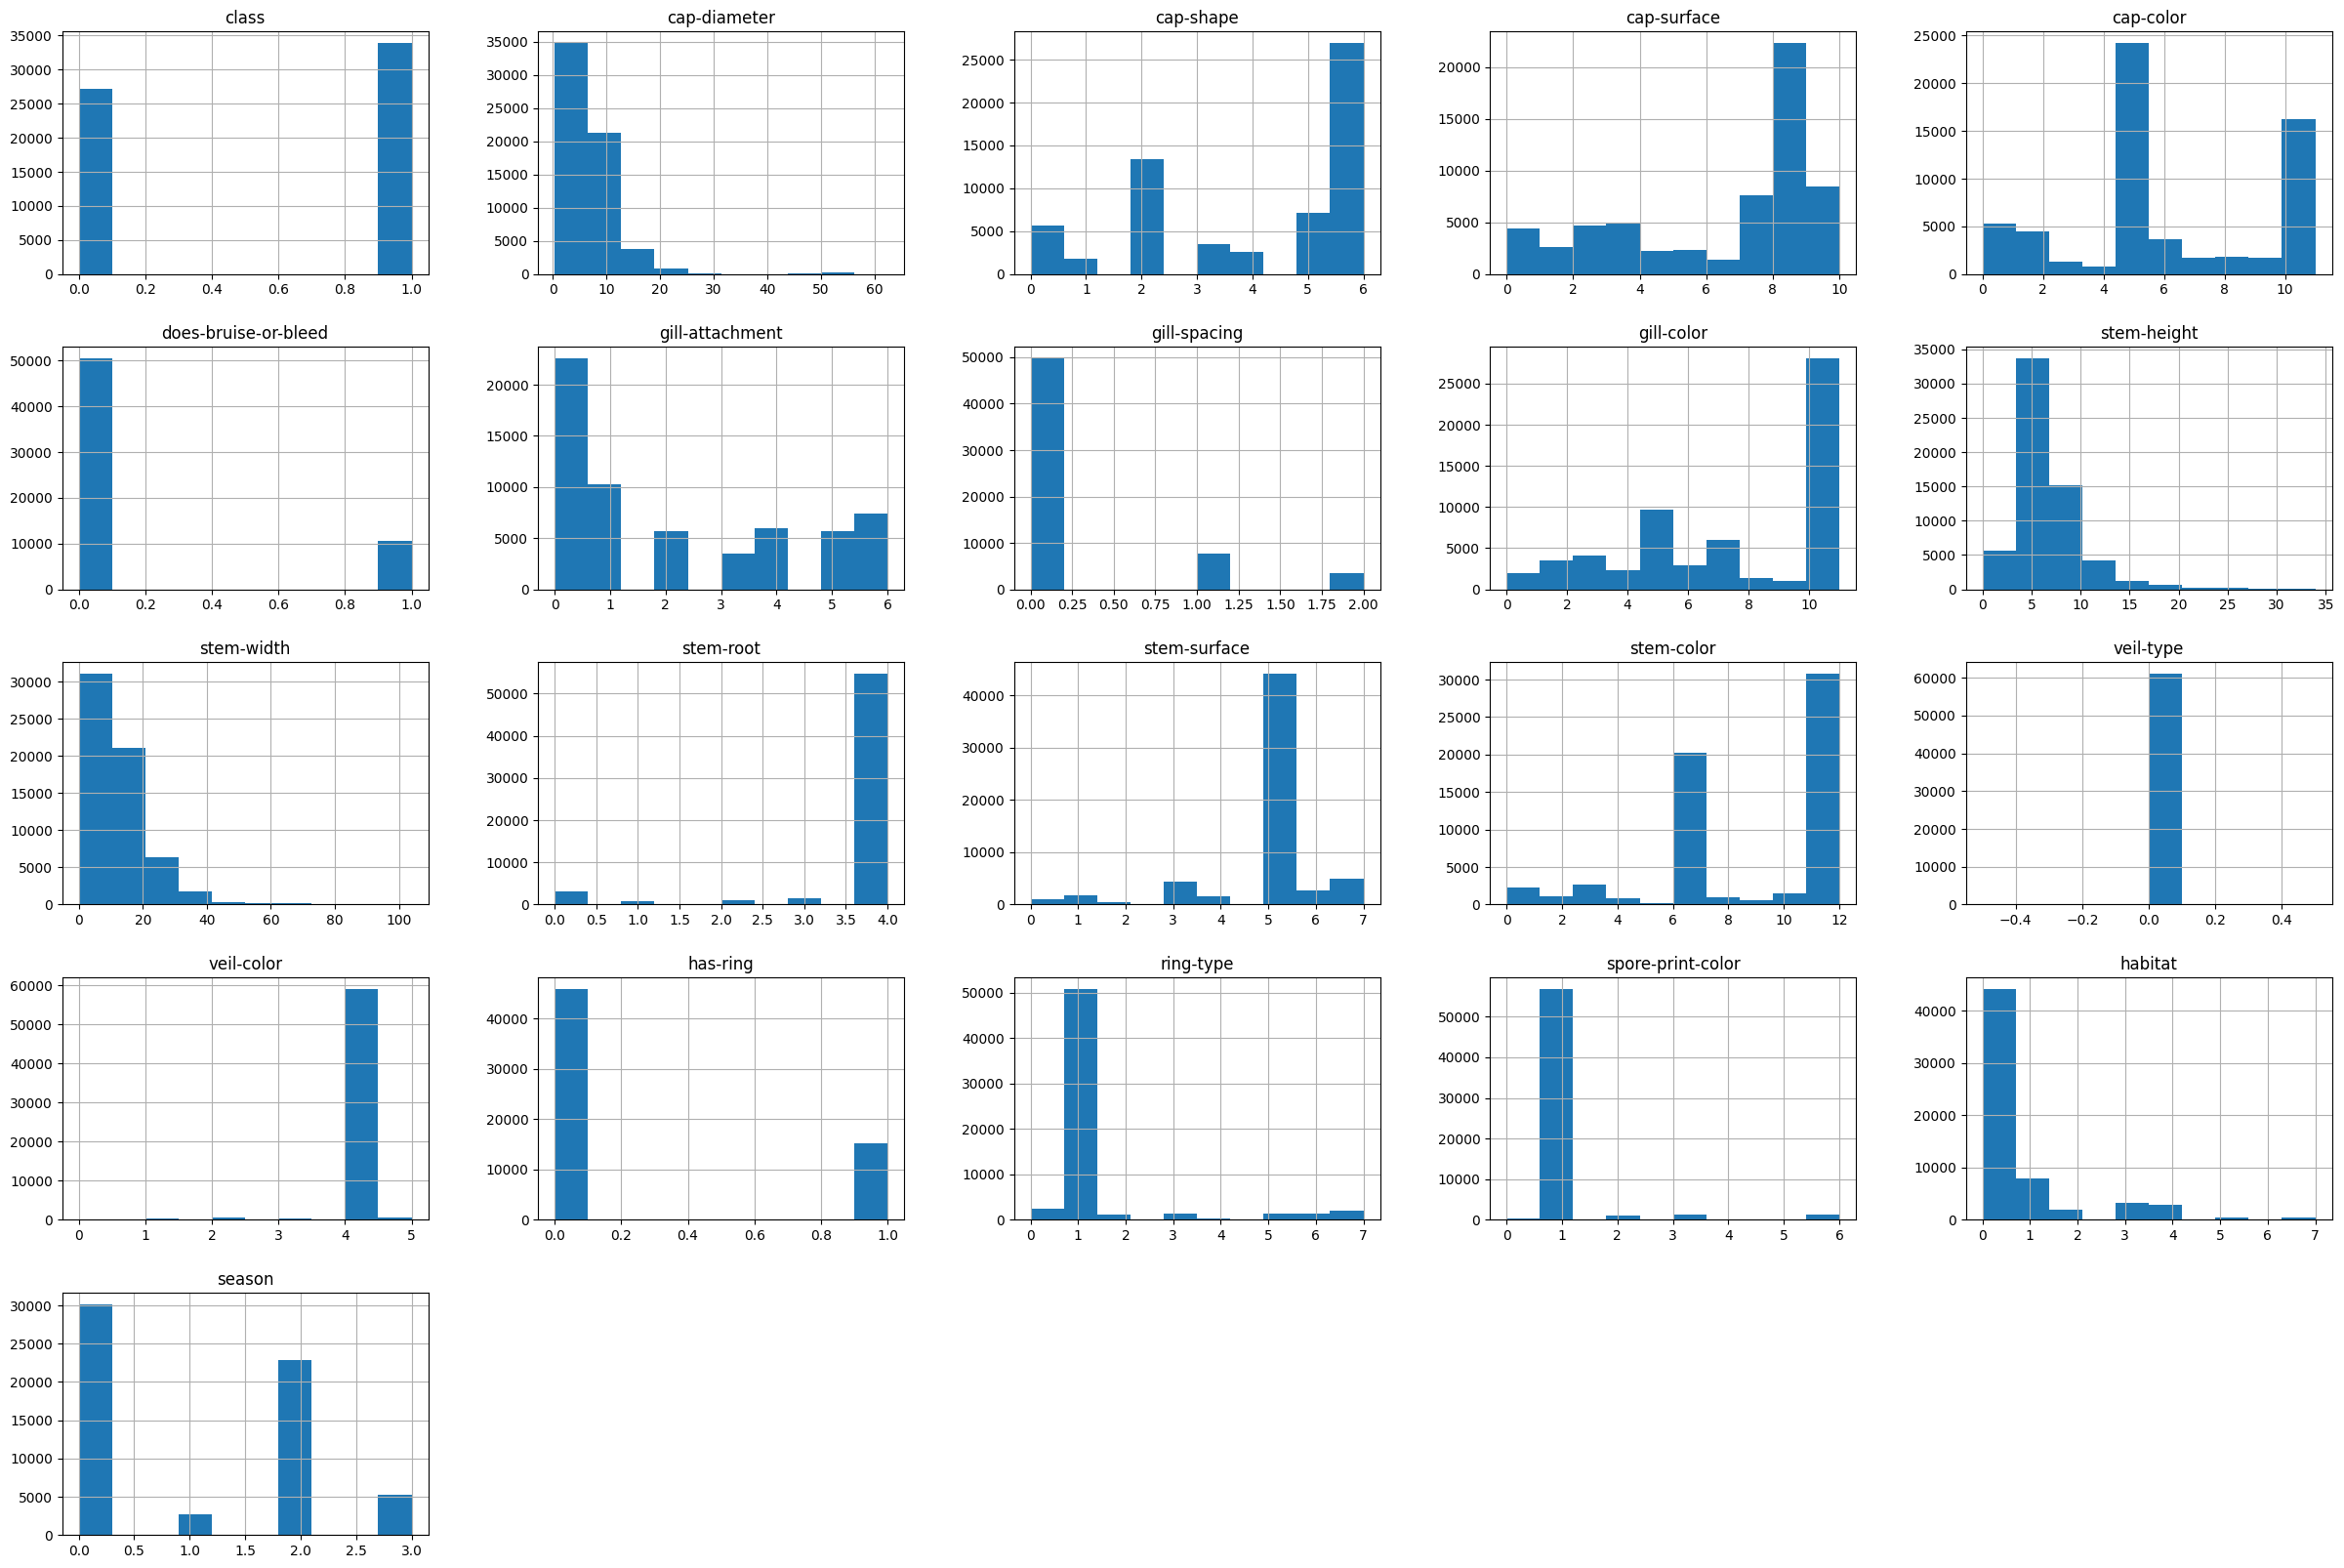

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(figsize=(30, 20))
plt.show()

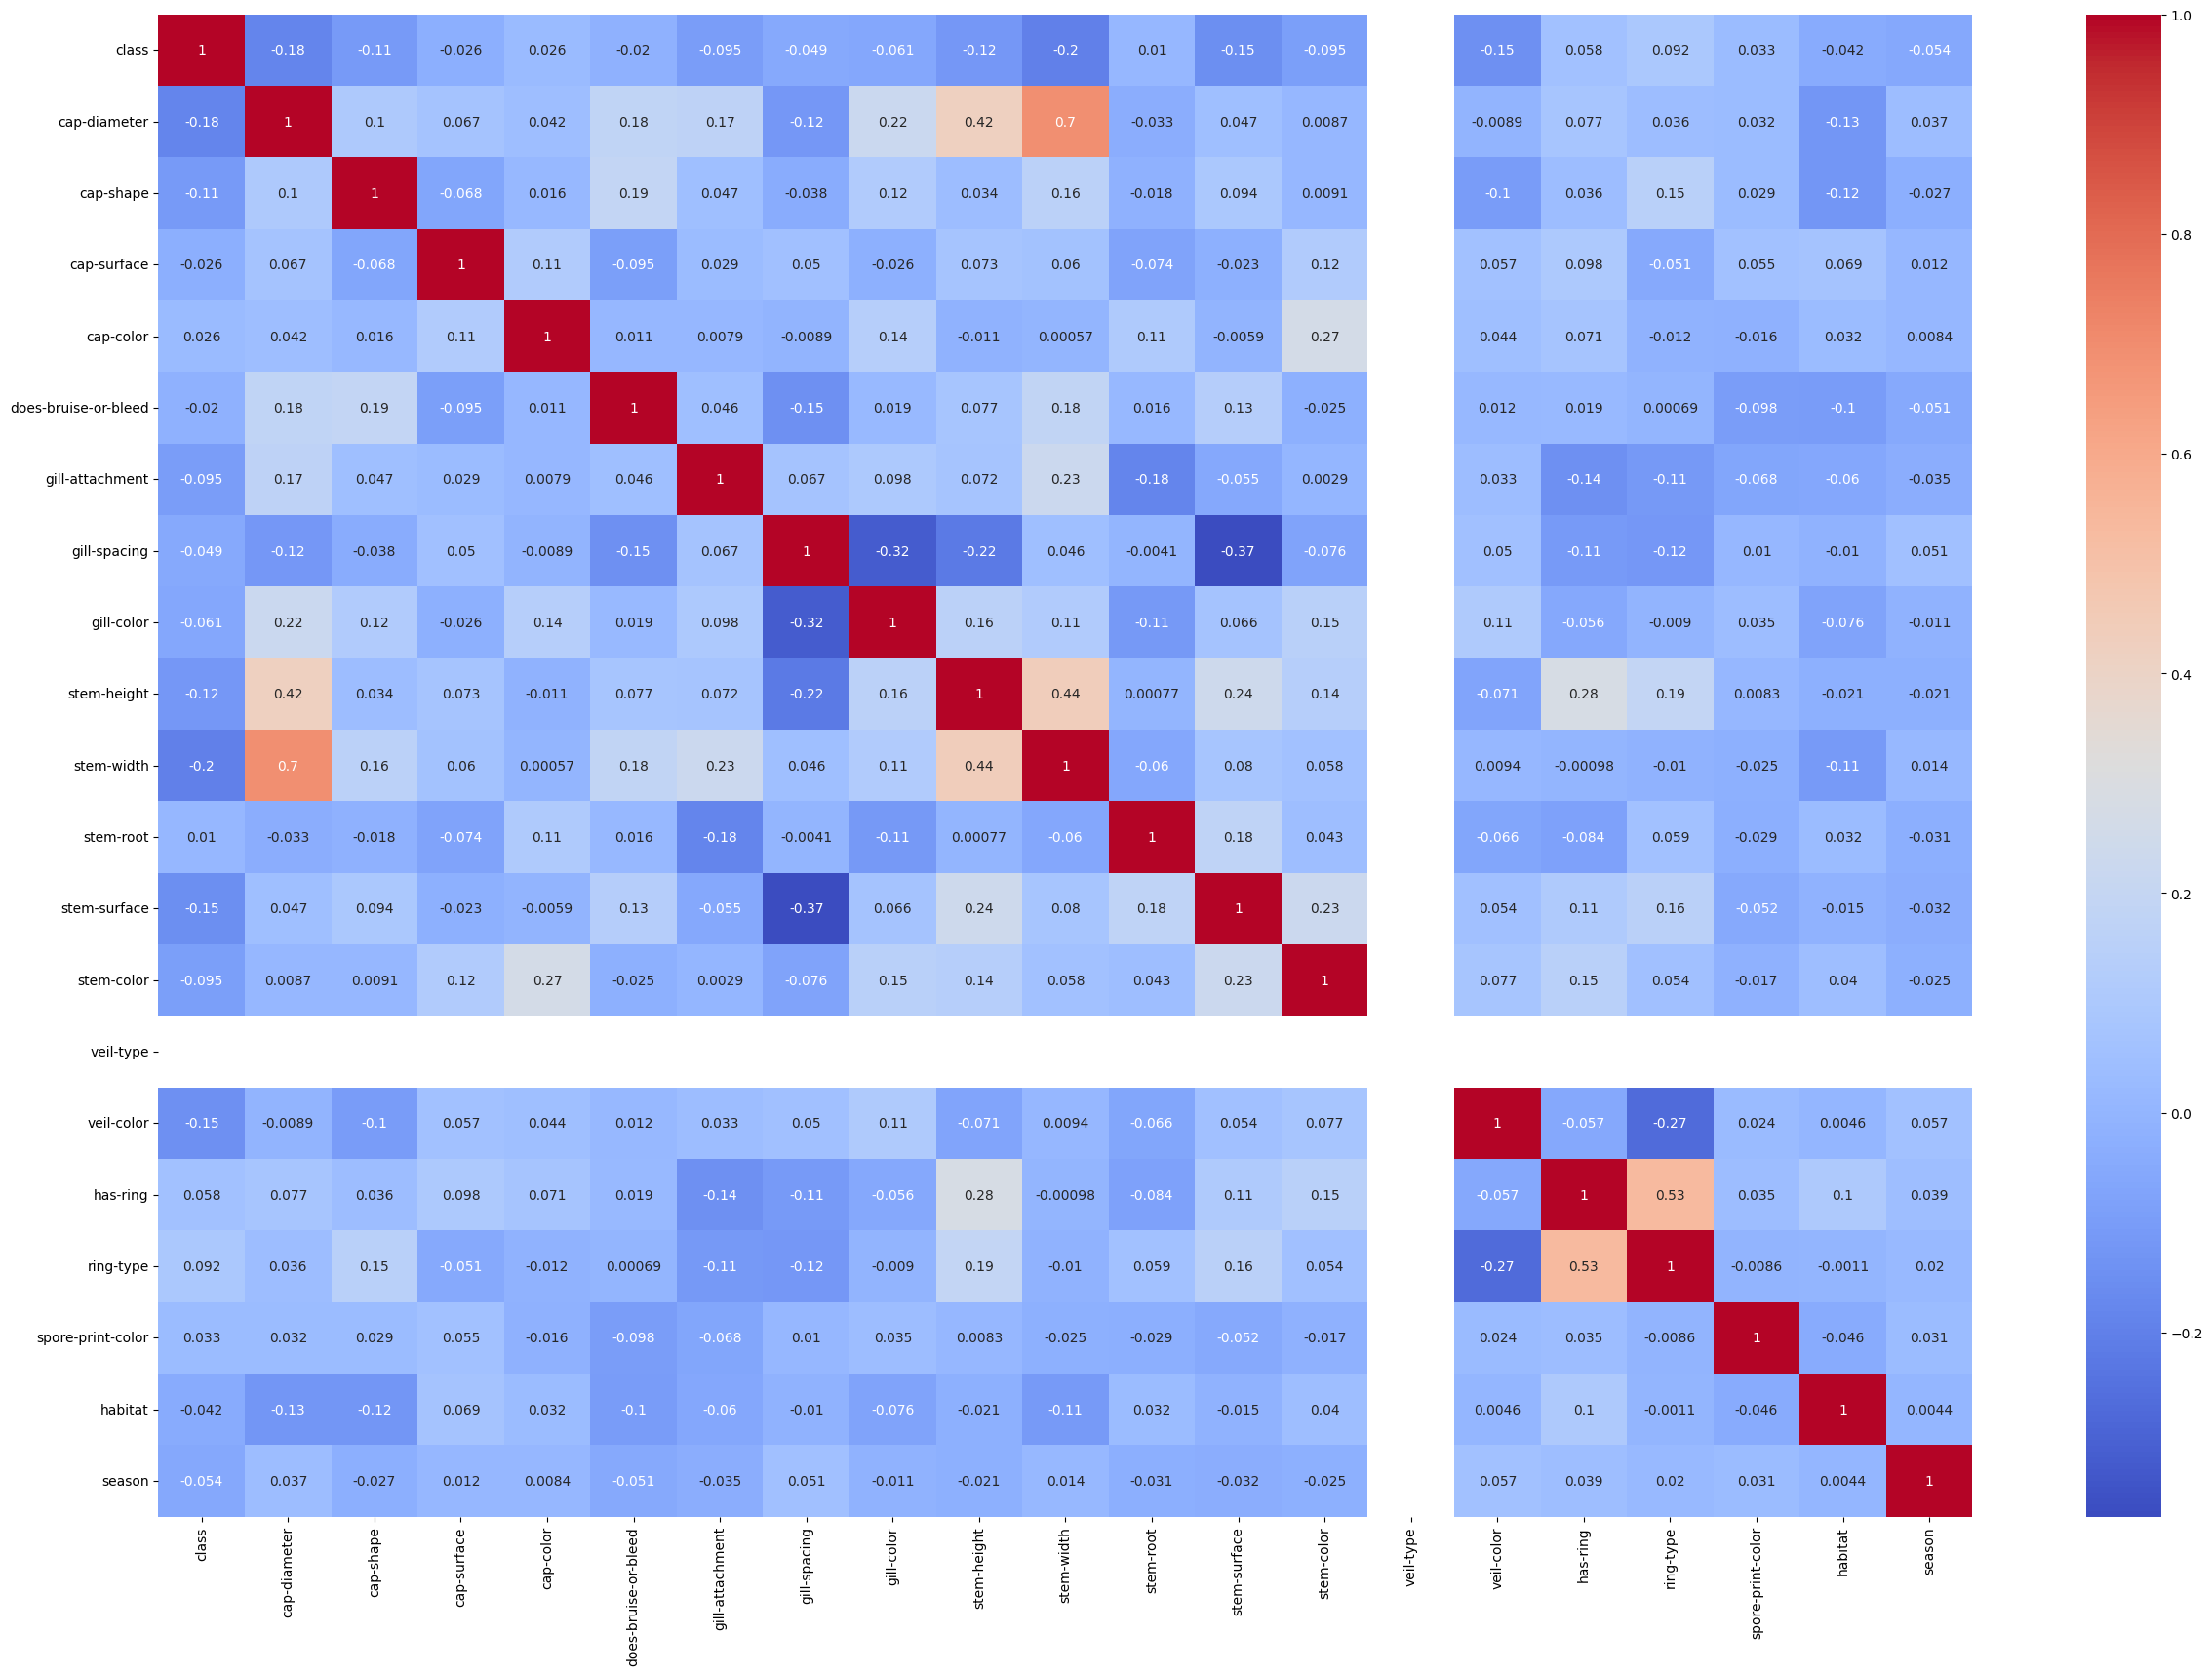

In [281]:
data_corr=data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data_corr,annot=True,cmap='coolwarm')
plt.show()

In [282]:
X=data.drop('class',axis=1)
y=data['class']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48855, 20), (12214, 20), (48855,), (12214,))

In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [285]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [286]:
rf_model = RandomForestClassifier(random_state=42)

In [287]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [288]:
y_pred = rf_model.predict(X_test)

In [289]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Random Forest Model:", accuracy)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))


Accuracy of the Random Forest Model: 0.9998362534796136

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [290]:
from sklearn.metrics import f1_score,precision_score,recall_score
print("Precision of Random Forest:",precision_score(y_test, y_pred))
print("Recall of Random Forest:",recall_score(y_test, y_pred))
print("F1 score of Random Forest:",f1_score(y_test, y_pred))

Precision of Random Forest: 0.9998538011695907
Recall of Random Forest: 0.9998538011695907
F1 score of Random Forest: 0.9998538011695907


In [291]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix for Random forest:",cm)

Confusion Matrix for Random forest: [[5373    1]
 [   1 6839]]


In [292]:
from sklearn.metrics import roc_auc_score
y_probs = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print(f'AUC for Random Forest: {auc:.2f}')

AUC for Random Forest: 1.00


In [293]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=0.1)

In [294]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [295]:
y_pred_log = log_reg.predict(X_test)

In [296]:
from sklearn.metrics import confusion_matrix
cm_log=confusion_matrix(y_test,y_pred_log)
print("Confusion Matrix for Logistic Regression:",cm_log)

Confusion Matrix for Logistic Regression: [[2797 2577]
 [1678 5162]]


In [297]:
accuracy = accuracy_score(y_test, y_pred_log)
print("\nAccuracy of the Logistic Regression:", accuracy)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))


Accuracy of the Logistic Regression: 0.6516292778778451

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.52      0.57      5374
           1       0.67      0.75      0.71      6840

    accuracy                           0.65     12214
   macro avg       0.65      0.64      0.64     12214
weighted avg       0.65      0.65      0.65     12214



In [298]:
print("Precision for Logistic Regression:",precision_score(y_test, y_pred_log))
print("Recall for Logistic Regression:",recall_score(y_test, y_pred_log))
print("F1 score of Logistic Regression:",f1_score(y_test, y_pred_log))

Precision for Logistic Regression: 0.6670112417625016
Recall for Logistic Regression: 0.7546783625730994
F1 score of Logistic Regression: 0.7081418478633651


In [299]:
y_proba_log=log_reg.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_proba_log)
print(f'AUC for Logistic Regression : {auc:.2f}')

AUC for Logistic Regression : 0.71


In [300]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

AUC: 0.9999982044803113


In [301]:
print("Precision for KNN:",precision_score(y_test, y_pred))
print("Recall for KNN:",recall_score(y_test, y_pred))
print("F1 score of KNN:",f1_score(y_test, y_pred))

Precision for KNN: 0.9994150336355659
Recall for KNN: 0.9991228070175439
F1 score of KNN: 0.9992688989618366


In [302]:
# inst=[[9.26, 'x', 'g', 'o', 't', 'e', 'c', 'w', 11, 17.09, 'b', 'y', 'u', 'w', 't', 'g', 'nan', 'd', 'u']]
inst=[[9.26,6,2,6,0,2,0,10,11,17.09,0,7,11,0,4,1,2,7,0,3]]
columns = data.drop('class',axis=1).columns
instance = pd.DataFrame(inst, columns=columns)
instance_scaled = scaler.transform(instance)
instance_pca = pca.transform(instance_scaled)
predicted_class = knn.predict(instance_pca)
print("Predicted Class:", predicted_class[0])
predicted_class = rf_model.predict(instance_pca)
print("Predicted Class:", predicted_class[0])
predicted_class = log_reg.predict(instance_pca)
print("Predicted Class:", predicted_class[0])

Predicted Class: 1
Predicted Class: 1
Predicted Class: 0


In [303]:
import pickle
pickle.dump(rf_model, open('model.pkl', 'wb'))  # Replace 'rf' with your trained model